In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_rt = pd.read_csv("Files/rt.movie_info.tsv.gz",sep="\t")
df_rt

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


### Cleaning Data

In [3]:
df_rt.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [4]:
df_rt[df_rt["studio"].isnull()]

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1991,Popular rap group Run DMC stars as a trio of p...,R,Action and Adventure|Drama,Rick Rubin,Rick Rubin|Ric Menello,NaN,NaN,NaN,NaN,92 minutes,NaN
1552,1992,"The title character, played by John Turturro, ...",R,Comedy|Drama,Joel Coen,Joel Coen|Ethan Coen,"Aug 21, 1991","May 20, 2003",NaN,NaN,116 minutes,NaN
1553,1993,A former child actor turned talent agent is hi...,PG,Comedy,James Lapine,NaN,"Jun 4, 1993","Apr 8, 2003",NaN,NaN,95 minutes,NaN
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN


In [5]:
#Creating a dataframe with studio names where box_office is not null
office_revenue = df_rt[df_rt["box_office"].notnull()]
office_revenue

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,"25,335,935",119 minutes,Universal Pictures
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,"1,416,189",129 minutes,Eros Entertainment
1545,1985,A woman who joins the undead against her will ...,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007","Oct 9, 2007",$,"59,371",98 minutes,IDP Distribution
1546,1986,Aki Kaurismaki's The Man Without a Past opens ...,PG,Art House and International|Comedy|Drama,NaN,NaN,"Aug 30, 2002","Oct 7, 2003",$,"794,306",97 minutes,NaN


In [6]:
#Removing commas from box office and converting to int
office_revenue["box_office"] = office_revenue["box_office"].str.replace(",","")
office_revenue["box_office"] = office_revenue["box_office"].astype("int64")


<ipython-input-6-e2c87a407da3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office_revenue["box_office"] = office_revenue["box_office"].str.replace(",","")
<ipython-input-6-e2c87a407da3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office_revenue["box_office"] = office_revenue["box_office"].astype("int64")


In [7]:
#Converting studio to string
office_revenue["studio"] = office_revenue["studio"].astype("string")


<ipython-input-7-f00e1fb77711>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office_revenue["studio"] = office_revenue["studio"].astype("string")


In [8]:
#confirming data type change
office_revenue.dtypes

id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
currency        object
box_office       int64
runtime         object
studio          string
dtype: object

In [9]:
#counting how many time each studio appears in the dataframe
office_revenue["studio"].value_counts()

Universal Pictures       27
Paramount Pictures       20
20th Century Fox         18
Sony Pictures            15
Warner Bros. Pictures    14
                         ..
Universal                 1
Screen Gems               1
The Film Arcade           1
Regent Releasing          1
IMAX                      1
Name: studio, Length: 116, dtype: Int64

In [10]:
#filling na studio values to "unknown" category
office_revenue["studio"] = office_revenue["studio"].fillna("unknown")
office_revenue["studio"]

<ipython-input-10-f9d085a49eb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office_revenue["studio"] = office_revenue["studio"].fillna("unknown")


1            Entertainment One
6           Paramount Pictures
7       Sony Pictures Classics
8                      unknown
15                ATO Pictures
                 ...          
1541        Universal Pictures
1542        Eros Entertainment
1545          IDP Distribution
1546                   unknown
1555           New Line Cinema
Name: studio, Length: 340, dtype: string

In [11]:
#Replacing studios with same name or under same company umbrella with a unique studio name

office_revenue["studio"]= office_revenue["studio"].replace("20th Century Fox Distribution","20th Century Fox")
office_revenue["studio"]= office_revenue["studio"].replace("A24","A24 Films")
office_revenue["studio"]= office_revenue["studio"].replace(["Buena Vista Distribution","Buena Vista Distribution Compa","Buena Vista Pictures"],"Buena Vista")
office_revenue["studio"]= office_revenue["studio"].replace("Columbia Tristar Pictures","Columbia Pictures")
office_revenue["studio"]= office_revenue["studio"].replace("Destination Film","Destination Films")
office_revenue["studio"]= office_revenue["studio"].replace(["DreamWorks SKG","Dreamworks Pictures"],"DreamWorks")
office_revenue["studio"]= office_revenue["studio"].replace("Fox Searchlight","Fox Searchlight Pictures")
office_revenue["studio"]= office_revenue["studio"].replace(["Lionsgate Films","Lions Gate Releasing","Lions Gate Films Inc.","Lions Gate","Lions Gate Films","Lionsgate" ],"LionsGate")
office_revenue["studio"]= office_revenue["studio"].replace(["Paramount","Paramount Classics","Paramount Studios","Paramount Vantage","Paramout","Paramout Pictures"],"Paramount Pictures")
office_revenue["studio"]= office_revenue["studio"].replace(["Sony Classics","Sony Pictures Classics","Sony Pictures Entertainment","Sony Pictures Releasing"],"Sony Pictures")
office_revenue["studio"]= office_revenue["studio"].replace("Summit Premiere","Summit Entertainment")
office_revenue["studio"]= office_revenue["studio"].replace(["Universal","Universal Pictures","Universal Pictures Distributio","Universal Pictures International"],"Universal Studios")
office_revenue["studio"]= office_revenue["studio"].replace(["WARNER BROTHERS PICTURES","WB","Warner Bros. Pictures"],"Warner Bros.")
office_revenue["studio"]= office_revenue["studio"].replace(["The Weinstein Co.","The Weinstein Company","Weinstein Co."],"Weinstein Company")
office_revenue["studio"]= office_revenue["studio"].replace("Newmarket Film Group","Newmarket Films")
office_revenue["studio"]= office_revenue["studio"].replace("FilmDistrict","Film District")
office_revenue["studio"]= office_revenue["studio"].replace("IFC First Take","IFC Films")


<ipython-input-11-7e49ec3cc5b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office_revenue["studio"]= office_revenue["studio"].replace("20th Century Fox Distribution","20th Century Fox")
<ipython-input-11-7e49ec3cc5b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office_revenue["studio"]= office_revenue["studio"].replace("A24","A24 Films")
<ipython-input-11-7e49ec3cc5b8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

<ipython-input-12-ba3e6f155433>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x,rotation=90);


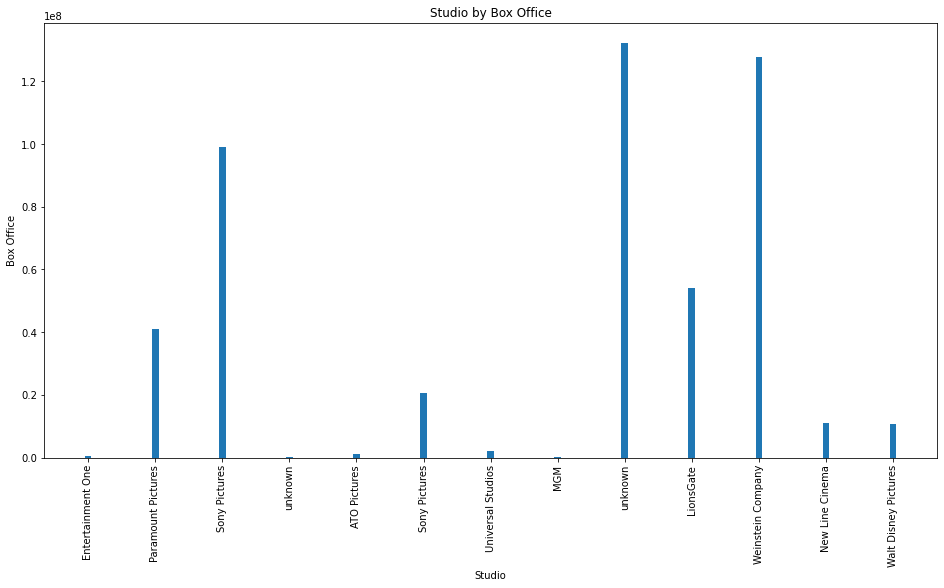

In [12]:
# Create the plot
fig, ax = plt.subplots(figsize=(16, 8))

# Graph X vs height as a bar graph
x = office_revenue["studio"].head(15)
y = office_revenue["box_office"].head(15)
ax.bar(x, y, width =0.1)

# Set title
ax.set_title("Studio by Box Office")

# Set labels for X and Y axes
ax.set_xlabel("Studio")
ax.set_ylabel("Box Office")

ax.set_xticklabels(labels=x,rotation=90);

### Data Preparation

In [15]:
#grouping data by studio to sum the total made in box_office for each studio over the years
boxoffice_total = (office_revenue.groupby("studio")).sum()

boxoffice_total = boxoffice_total.drop("id", axis=1)
boxoffice_total.head(50)


,box_office
studio,
20th Century Fox,1109832659
A24 Films,30282870
ATO Pictures,1039869
Apparition Films,4341275
Aspiration Media,347321
Broad Green Pictures,15425870
Buena Vista,251461353
Buffalo Films,1320005
CBS Films,4700000


In [16]:
boxoffice_total.reset_index(inplace= True)

In [17]:
max_box = boxoffice_total.box_office.max()
max_box

2425011607

In [18]:
#creating a limit variable to plot
limit = max_box + (1*10**9)
limit

3425011607

In [19]:
#finding min box_office
min_box = boxoffice_total.box_office.min()
min_box

363

In [31]:
#function to define currency on graphs for box_office
def currency(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e9:
        s = '${:1.1f}M'.format(x*1e-9)
    if x >= 1e6:
        s = '${:1.1f}B'.format(x*1e-6)
    else:
        s = '${:1.0f}K'.format(x*1e-3)
    return s

<ipython-input-28-e9126460177f>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x,rotation=90);


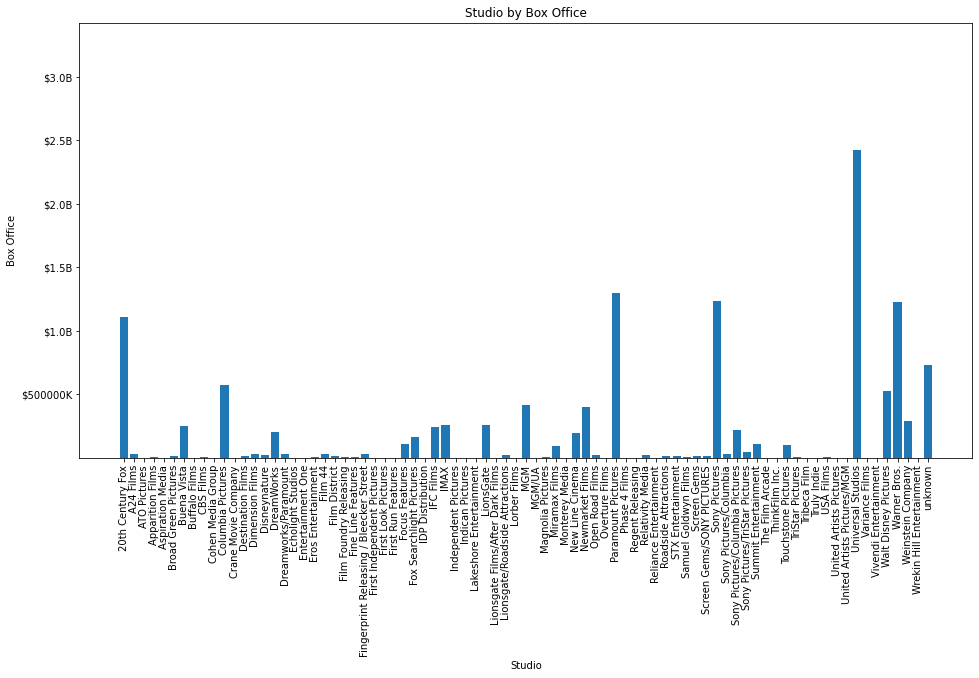

In [28]:
#create the plot
fig, ax = plt.subplots(figsize=(16, 8))

#graph X vs height as a bar graph
x = boxoffice_total["studio"]
y = boxoffice_total["box_office"]
ax.bar(x, y)

#set title
ax.set_title("Studio by Box Office")

#set labels for X and Y axes
ax.set_xlabel("Studio")
ax.set_ylabel("Box Office")

ax.set_ylim([100,limit])
     
      
ax.yaxis.set_major_formatter(currency)

ax.set_xticklabels(labels=x,rotation=90);

In [22]:
box_sorted = boxoffice_total.sort_values(by='box_office', ascending=False)
box_sorted

,studio,box_office
73,Universal Studios,2425011607
49,Paramount Pictures,1298615252
59,Sony Pictures,1236507465
77,Warner Bros.,1226198282
0,20th Century Fox,1109832659
...,...,...
34,Indican Pictures,25658
44,Monterey Media,22099
50,Phase 4 Films,16632
27,First Run Features,8856


<ipython-input-29-9daba2e9b475>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x,rotation=90);


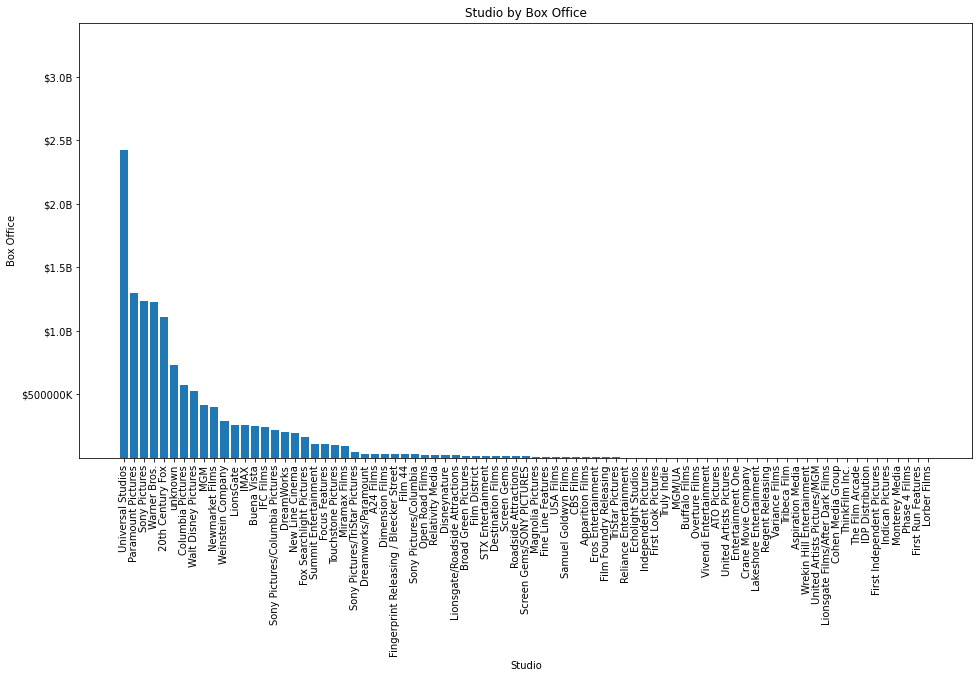

In [29]:
fig, ax = plt.subplots(figsize=(16, 8))

#graph X vs height as a bar graph
x = box_sorted["studio"]
y = box_sorted["box_office"]
ax.bar(x, y)

#set title
ax.set_title("Studio by Box Office")

#set labels for X and Y axes
ax.set_xlabel("Studio")
ax.set_ylabel("Box Office")

ax.set_ylim(10000,limit)
     
      
ax.yaxis.set_major_formatter(currency)

ax.set_xticklabels(labels=x,rotation=90);

### Sorting for the Top 20 Studios

In [34]:
top10_df= box_sorted.iloc[:10]
top10_df

,studio,box_office
73,Universal Studios,2425011607
49,Paramount Pictures,1298615252
59,Sony Pictures,1236507465
77,Warner Bros.,1226198282
0,20th Century Fox,1109832659
80,unknown,733725904
10,Columbia Pictures,573883615
76,Walt Disney Pictures,527069599
40,MGM,413329948
46,Newmarket Films,402787787


<ipython-input-35-c4ffa6a9d065>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x,rotation=90);


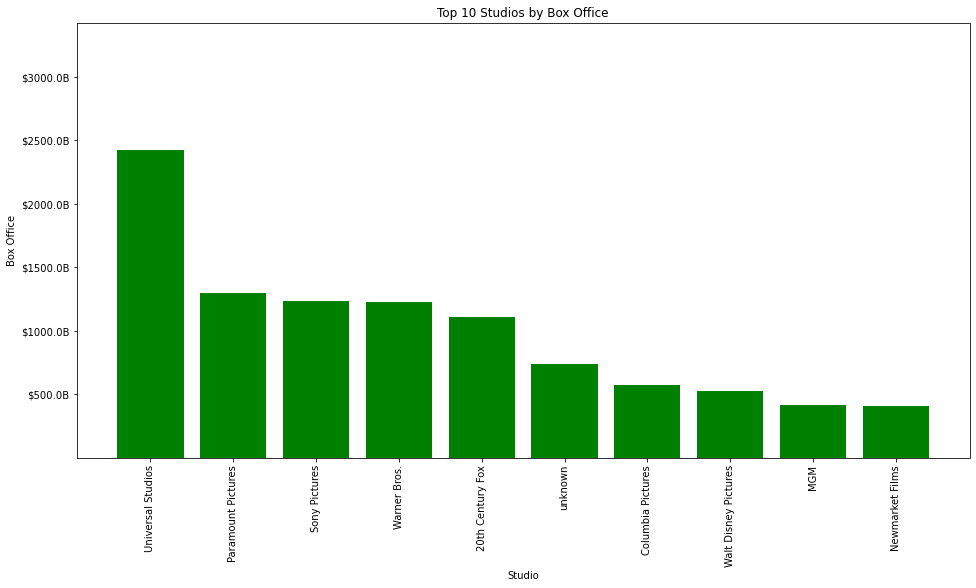

In [35]:
fig, ax = plt.subplots(figsize=(16, 8))

#graph X vs height as a bar graph
x = top10_df["studio"]
y = top10_df["box_office"]
ax.bar(x, y, color = "green")

#set title
ax.set_title("Top 10 Studios by Box Office")

#set labels for X and Y axes
ax.set_xlabel("Studio")
ax.set_ylabel("Box Office")

ax.set_ylim(100000,limit)
     
      
ax.yaxis.set_major_formatter(currency)

ax.set_xticklabels(labels=x,rotation=90);